<a href="https://colab.research.google.com/github/fateme-nabati/Gender-detection/blob/main/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive


drive.mount('/content/gdrive')
%cd /content/gdrive

Mounted at /content/gdrive
/content/gdrive


In [3]:
import cv2
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [4]:
def detect_faces(path_to_image: str):
    # Load the image using OpenCV
    img = cv2.imread(path_to_image)
    # load face cascade and eye cascade
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # search faces
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    return img, faces

In [11]:
# path_to_sample_image = "/content/gdrive/MyDrive/gt_db/s01_Male/01.jpg"
# img = cv2.imread(path_to_sample_image, cv2.IMREAD_UNCHANGED)
# print(img.shape)
# cv2_imshow(img)


# Set the path to the folder containing the images
path_to_images = "/content/gdrive/MyDrive/gt_db"

# Initialize two lists to hold the images and their labels
images = [] # images of dataset after required changes
labels = [] # labels of images

# Loop through all folders in the dataset (each folder contains 15 images of one person)
for folderName in os.listdir(path_to_images):
    print(folderName)
    detected_faces = []
    sub_path = path_to_images + "/" + folderName
    # Loop through all images in each folder
    for fileName in os.listdir(sub_path):
        if fileName.endswith("jpg"):
            img, faces = detect_faces(os.path.join(sub_path, fileName))
            for (x1, y1, w, h) in faces:
                # cv2.rectangle(img, (x1, y1), (x1+w, y1+h), (0, 255, 0), 2)
                x2, y2 = x1 + w, y1 + h
                image = img[y1:y2, x1:x2]
                detected_faces.append(image)
    for image in detected_faces:
        # Resize the image to a fixed size (e.g. 100x100)
        resized = cv2.resize(image, (100, 100))
        # Add the resized image to the list of images
        images.append(resized)
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # plt.figure()
        # plt.imshow(image)
        # plt.show()
        # Parse the label from the folderName (assuming the folderName is in the format "number_gender.jpg")
        label = int(folderName.split("_")[1] == "Male")
        # Add the label to the list of labels
        labels.append(label)


s01_Male
s02_Male
s03_Male
s04_Male
s05_Female
s06_Male
s07_Male
s08_Male
s09_Male
s11_Male
s12_Male
s13_Male
s14_Male
s15_Male
s16_Male
s17_Male
s18_Male
s19_Male
s20_Male
s10_Female
s22_Male
s23_Male
s24_Male
s25_Male
s27_Male
s28_Male
s29_Male
s21_Female
s26_Female
s30_Female
s31_Male
s32_Male
s33_Male
s34_Male
s35_Male
s36_Male
s37_Male
s38_Male
s39_Male
s40_Male
s41_Male
s44_Male
s45_Male
s46_Male
s47_Male
s48_Male
s49_Male
s50_Male
s42_Female
s43_Female


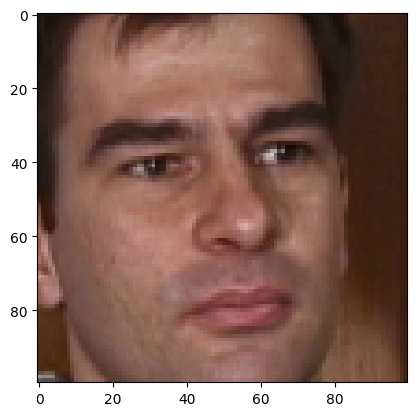

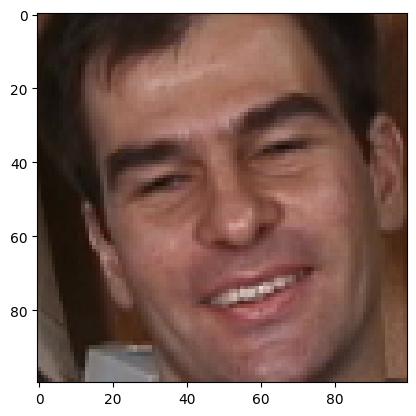

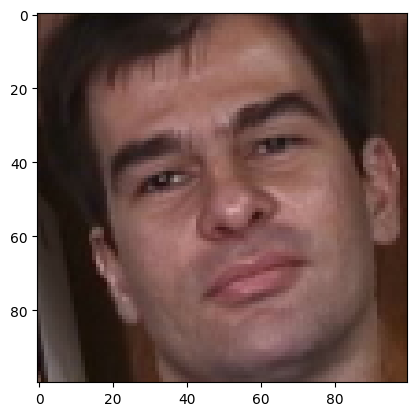

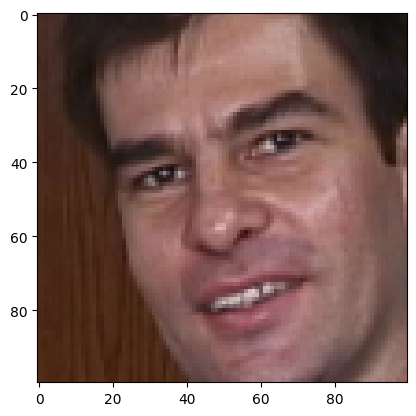

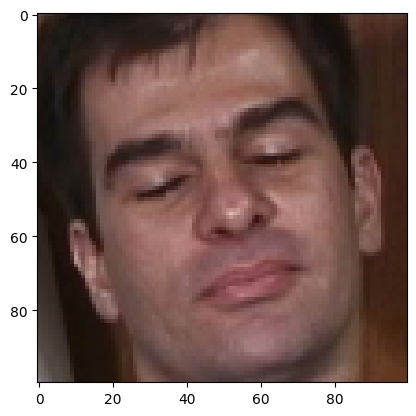

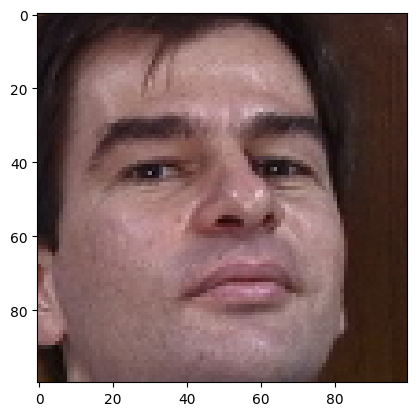

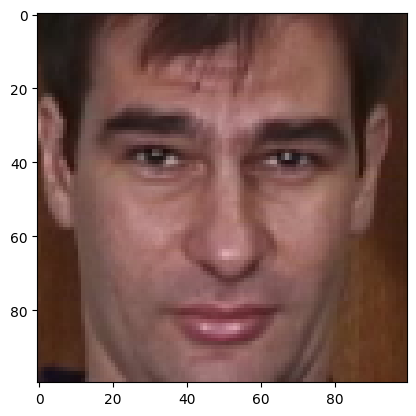

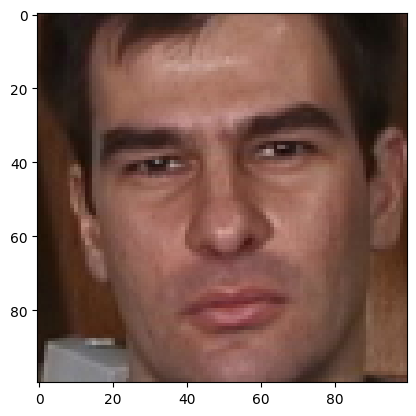

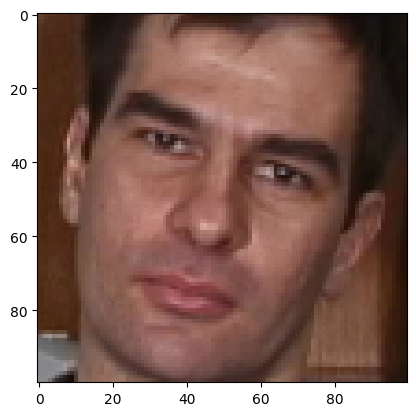

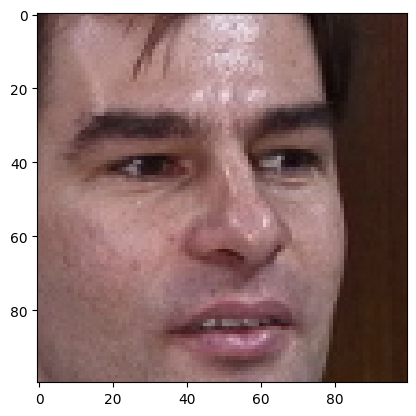

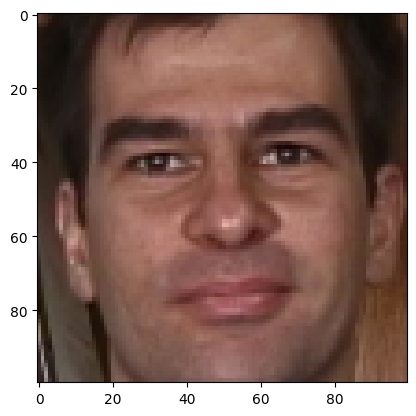

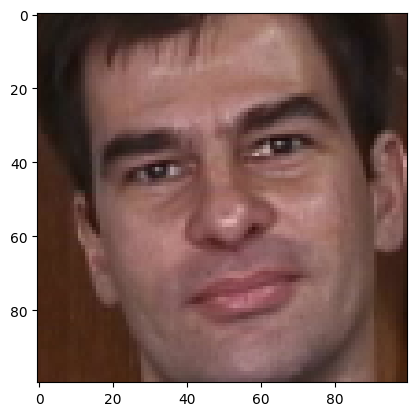

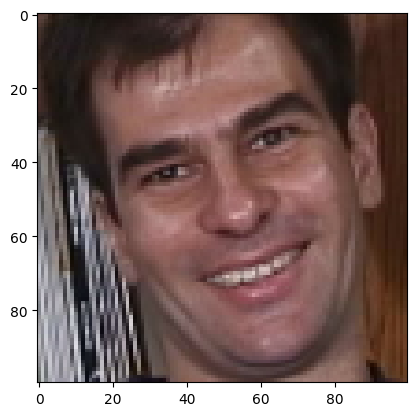

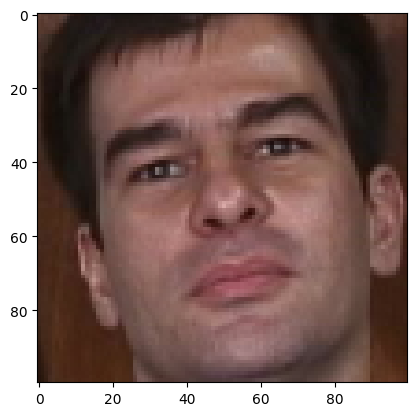

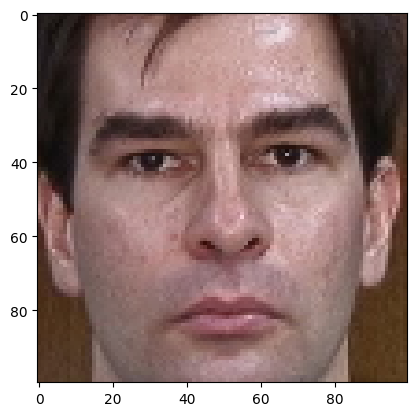

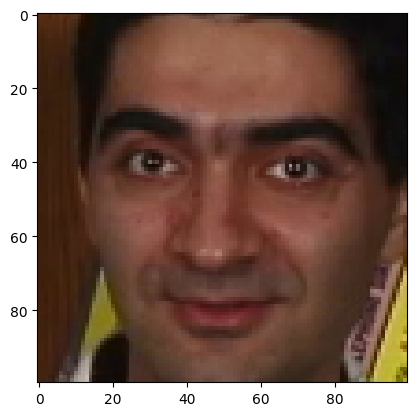

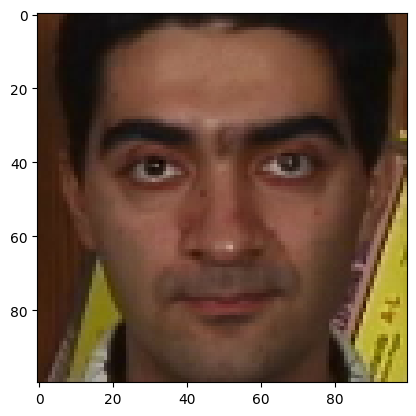

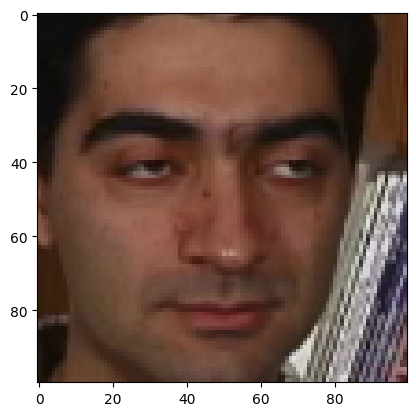

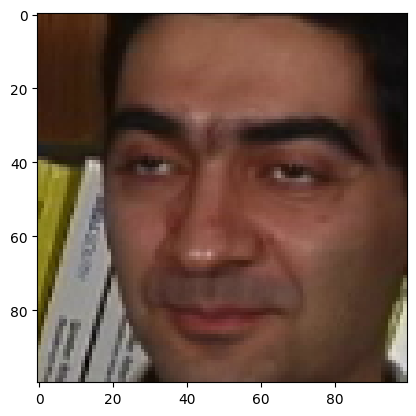

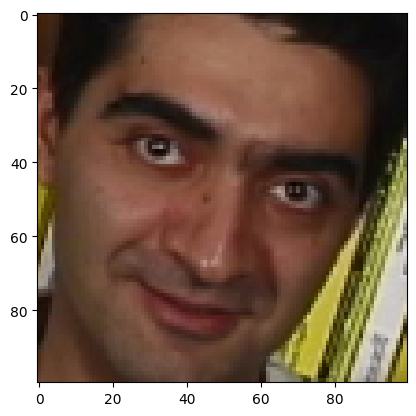

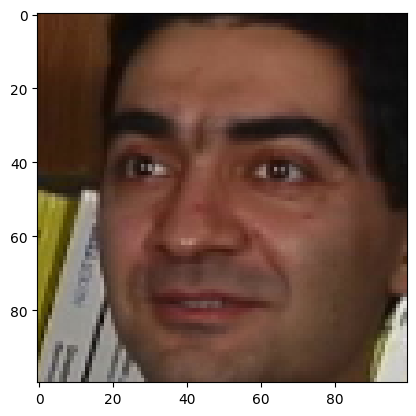

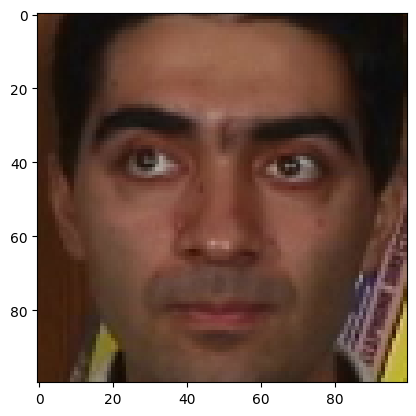

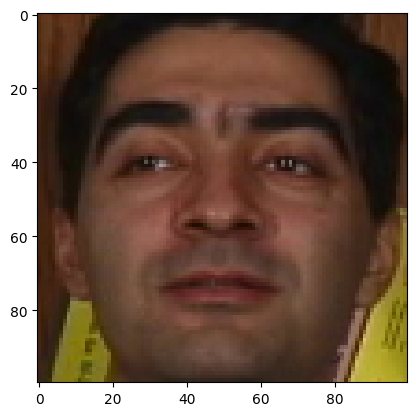

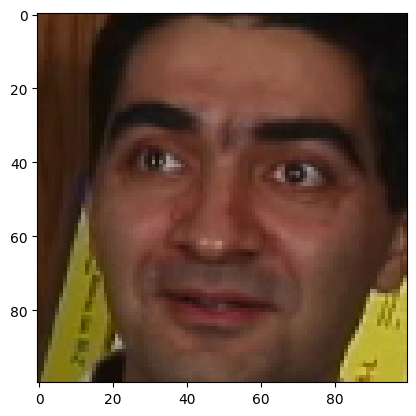

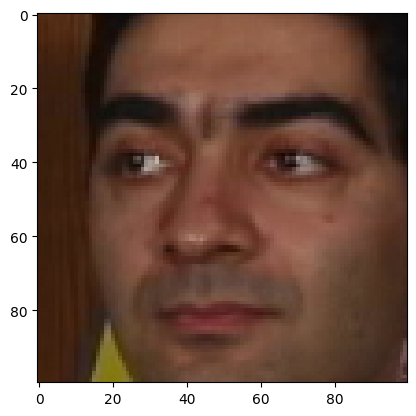

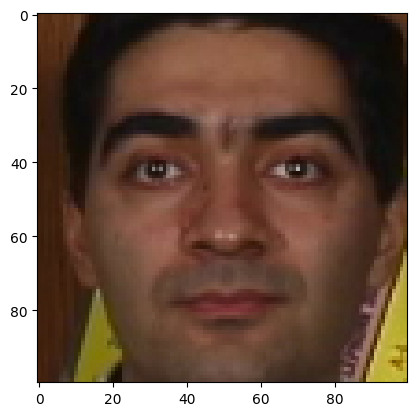

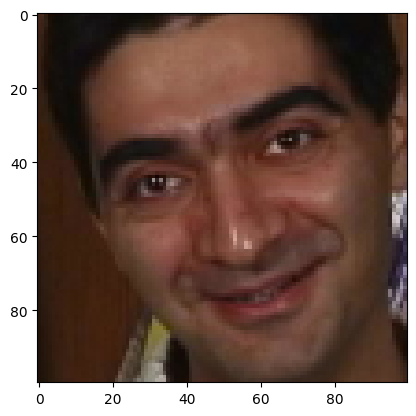

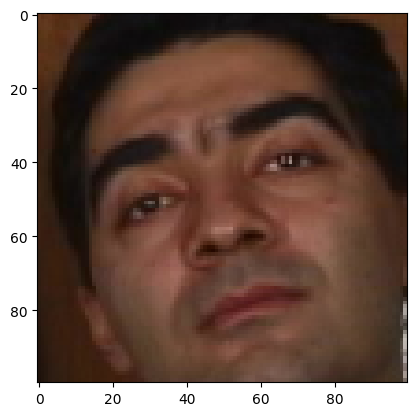

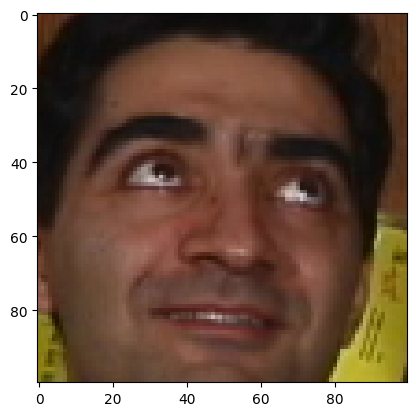

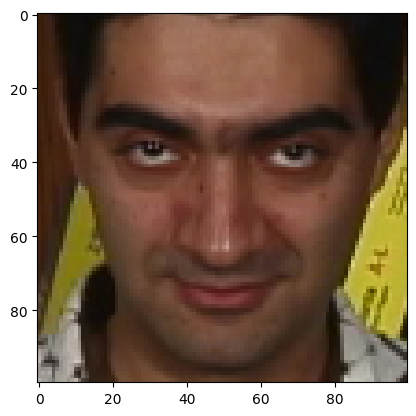

In [ ]:
i = 0
for image in images:
    i+=1
    if i<=30:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.figure()
        plt.imshow(image)
        plt.show()


In [6]:
print("images -> ")
print(len(images))
print("labels -> ")
print(len(labels))

images -> 
706
labels -> 
706


In [7]:
pip install numpy

In [8]:
from skimage.feature import hog
from skimage import exposure
import numpy as np

X = []
# Extract features
for image in images:
    fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, multichannel=True)
    # plt.axis("off")
    # plt.imshow(hog_image, cmap="gray")
    X.append(fd)
# Change images array
images = X

# Convert the lists of images and labels to numpy arrays
images = np.array(images)
labels = np.array(labels)


<ipython-input-8-88488700e4d9>:8: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, multichannel=True)


In [9]:
from sklearn.decomposition import PCA

# Create a PCA object with 2 components
pca = PCA(n_components=2)

# Fit the PCA model to the data and transform the data
images_pca = pca.fit_transform(images)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create an LDA object with 2 components
lda = LinearDiscriminantAnalysis(n_components=2)

# Fit the LDA model to the data and transform the data
images_lda = lda.fit_transform(images, labels)

Accuracy score 0.858
